In [1]:
from src.dataExt import *
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
from IPython.display import Audio
import numpy as np

In [2]:
loader = MusicNetLoader(root=os.path.expanduser("~/data/musicnet"), label="train")

Found instrument IDs: [43]


In [3]:
import IPython.display as ipd

# Access full audio and labels for a specific ID
audio, sr, labels = loader.access(1818)

# Listen to first 10 seconds
ipd.Audio(audio[:10*sr], rate=sr)


In [4]:
labels.head()

,start_time,end_time,instrument,note,start_beat,end_beat,note_value
0,26589.0,218077.0,71,58,12.0,4.000000,Whole
1,26589.0,69086.0,71,51,12.0,1.000000,Quarter
2,26589.0,190430.0,72,70,12.0,3.490625,Dotted Half
3,48094.0,68574.0,61,63,12.5,0.490625,Eighth
4,48094.0,68574.0,72,67,12.5,0.490625,Eighth


In [5]:
ipd.Audio(audio[10*sr:20*sr], rate=sr)

In [6]:
sample_df = loader.sample(1818)


In [7]:
sample_df.head(40)

,id,chunk_start,chunk_end,instrument_groups,target
0,1818,0,44100,[7],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
1,1818,44100,88200,"[6, 7]","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, ..."
2,1818,88200,132300,"[6, 7]","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, ..."
3,1818,132300,176400,"[6, 7]","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, ..."
4,1818,176400,220500,"[6, 7]","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, ..."
5,1818,220500,264600,"[6, 7]","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, ..."
6,1818,264600,308700,"[6, 7]","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, ..."
7,1818,308700,352800,"[6, 7]","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, ..."
8,1818,352800,396900,"[6, 7]","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, ..."
9,1818,396900,441000,"[6, 7]","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, ..."


In [8]:
audio, sr, labels = loader.access(1817)
print(sr)

44100


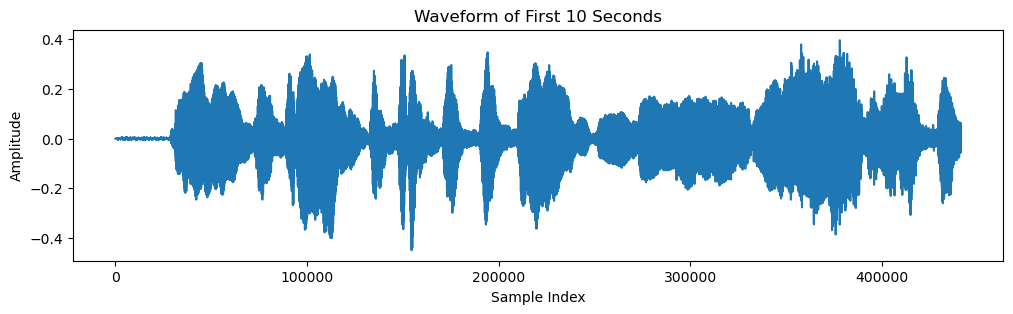

In [9]:
import matplotlib.pyplot as plt

# Plot waveform of first 10 seconds
plt.figure(figsize=(12, 3))
plt.plot(audio[:10*sr])
plt.title("Waveform of First 10 Seconds")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.show()

In [10]:
dataloader = loader.get_loader(batch_size=4)

for batch in dataloader:
    audio_batch, label_batch = batch
    print("Audio shape:", audio_batch.shape)   # [B, samples]
    print("Label shape:", label_batch.shape)   # [B, 10]
    break


Audio shape: torch.Size([4, 441000])
Label shape: torch.Size([4, 10])


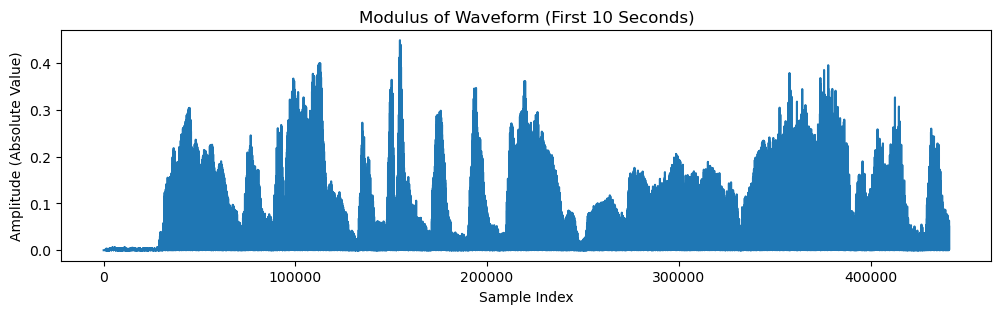

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Plot modulus of waveform for first 10 seconds
plt.figure(figsize=(12, 3))
plt.plot(np.abs(audio[:10*sr]))  # Take absolute value
plt.title("Modulus of Waveform (First 10 Seconds)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude (Absolute Value)")
plt.show()
